In [35]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install mpld3


     ---------------------------------------- 0.0/201.2 kB ? eta -:--:--
     ----------------------- -------------- 122.9/201.2 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 201.2/201.2 kB 4.1 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
import mpld3

In [4]:
import matplotlib.pyplot as plt

In [5]:
import plotly.express as px

In [6]:
log_entries = [
    "Error: Unable to connect to the server.",
    "Info: Application started.",
    "Error: File not found.",
    "Error: Invalid input received.",
    "Error: Connection timeout.",
    "Info: Data processing complete.",
    "Error: Database query failed.",
    "Info: User session expired.",
    "Error: Data corruption detected.",
    "Info: Print job started.",
    "Warning: Network congestion.",
    "Info: Order confirmed.",
    "Info: Notification sent.",
    "Error: Configuration error.",
    "Info: Cache cleared.",
    "Info: Task completed.",
    "Warning: Input validation failed.",
    "Info: Video rendered.",
    "Info: Transaction recorded.",
    "Info: Application started.",
    "Info: User login successful.",
    "Info: Data processing complete.",
    "Warning: Disk space running low.",
    "Info: Application shutdown.",
    "Warning: High CPU usage detected.",
    "Info: Configuration updated.",
    "Error: Critical system error.",
    "Info: Report generated.",
    "Info: Task scheduled.",
    "Info: Operation completed successfully.",
    "Warning: Data transfer interrupted.",
    "Info: User profile updated.",
    "Info: Database backup completed.",
    "Info: Application started.",
    "Info: User login successful.",
    "Info: Data processing complete.",
    "Warning: Disk space running low.",
    "Info: Application shutdown.",
    "Warning: High CPU usage detected.",
    "Info: Configuration updated.",
    "Error: Critical system error.",
    "Info: Report generated.",
    "Info: Task scheduled.",
    "Error: Invalid input received.",
    "Info: Operation completed successfully.",
    "Warning: Data transfer interrupted.",
    "Info: User profile updated.",
    "Info: Database backup completed.",
    "Error: Invalid input received."
]

In [7]:
# Create a pandas DataFrame from the list of log entries
df = pd.DataFrame(log_entries, columns=['Log'])

In [8]:
print(df)

                                        Log
0   Error: Unable to connect to the server.
1                Info: Application started.
2                    Error: File not found.
3            Error: Invalid input received.
4                Error: Connection timeout.
5           Info: Data processing complete.
6             Error: Database query failed.
7               Info: User session expired.
8          Error: Data corruption detected.
9                  Info: Print job started.
10             Warning: Network congestion.
11                   Info: Order confirmed.
12                 Info: Notification sent.
13              Error: Configuration error.
14                     Info: Cache cleared.
15                    Info: Task completed.
16        Warning: Input validation failed.
17                    Info: Video rendered.
18              Info: Transaction recorded.
19               Info: Application started.
20             Info: User login successful.
21          Info: Data processin

In [9]:
df = pd.DataFrame(log_entries, columns=['Log'])

In [10]:
error_rows = df[df['Log'].str.startswith('Error')]

In [11]:
print(error_rows)

                                        Log
0   Error: Unable to connect to the server.
2                    Error: File not found.
3            Error: Invalid input received.
4                Error: Connection timeout.
6             Error: Database query failed.
8          Error: Data corruption detected.
13              Error: Configuration error.
26            Error: Critical system error.
40            Error: Critical system error.
43           Error: Invalid input received.
48           Error: Invalid input received.


In [12]:
error_counts = error_rows['Log'].value_counts()
error_counts

Error: Invalid input received.             3
Error: Critical system error.              2
Error: Unable to connect to the server.    1
Error: File not found.                     1
Error: Connection timeout.                 1
Error: Database query failed.              1
Error: Data corruption detected.           1
Error: Configuration error.                1
Name: Log, dtype: int64

Text(0, 0.5, 'Count')

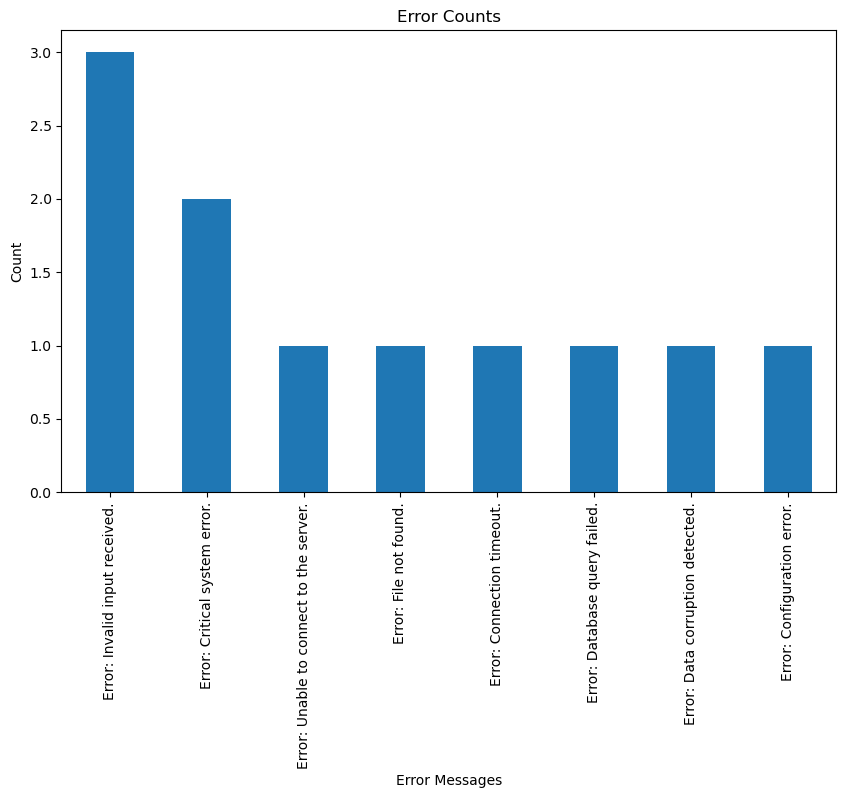

In [13]:
plt.figure(figsize=(10, 6))
error_counts.plot(kind='bar')
plt.title('Error Counts')
plt.xlabel('Error Messages')
plt.ylabel('Count')

In [14]:
#Error count in graphical format 
html_viz = mpld3.fig_to_html(plt.gcf())

<Figure size 640x480 with 0 Axes>

In [15]:
html_file_path = 'error_counts.html'
with open(html_file_path, 'w') as html_file:
    html_file.write(html_viz)

In [16]:
print(f"Interactive HTML visualization saved as '{html_file_path}'.")

Interactive HTML visualization saved as 'error_counts.html'.


In [17]:
fig = px.bar(error_counts, x=error_counts.index, y='Log', title='Error Counts')
html_file_path = 'error_counts.html'
fig.write_html(html_file_path)

print(f"Interactive HTML visualization saved as '{html_file_path}'.")

Interactive HTML visualization saved as 'error_counts.html'.


In [18]:
#Error display in table format
html_table = error_rows.to_html(index=False)

In [19]:
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Error Log Table</title>
</head>
<body>
    <h1>Error Log Table</h1>
    {html_table}
</body>
</html>
"""

In [20]:
html_file_path = 'error_table.html'
with open(html_file_path, 'w') as html_file:
    html_file.write(html_content)

print(f"Error log table saved as '{html_file_path}'.")

Error log table saved as 'error_table.html'.


Text(0.5, 1.0, 'Error Distribution')

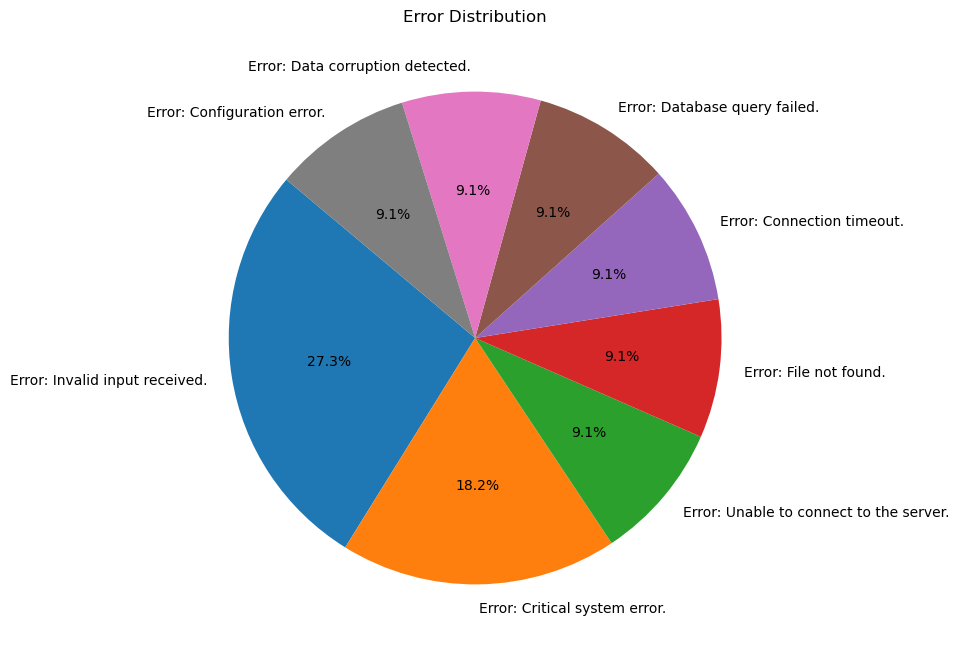

In [27]:
#Error display in pie chart format
plt.figure(figsize=(8, 8))
plt.pie(error_counts, labels=error_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Error Distribution')



In [28]:
# Convert the plot to an interactive HTML visualization using mpld3
html_viz = mpld3.fig_to_html(plt.gcf())

<Figure size 640x480 with 0 Axes>

In [29]:
# Create an HTML template to embed the visualization
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Error Pie Chart</title>
    
    <script src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.17/d3.min.js"></script>
    <script src="https://mpld3.github.io/js/mpld3.v0.5.2.js"></script>
</head>
<body>
    <h1>Error Pie Chart</h1>
    {html_viz}
</body>
</html>
"""

In [31]:
# Create an interactive pie chart using plotly
fig = px.pie(error_counts, names=error_counts.index, title='Error Distribution')

# Save the interactive HTML visualization
html_file_path = 'error_pie_chart.html'
fig.write_html(html_file_path)

print(f"Interactive error pie chart saved as '{html_file_path}'.")


Interactive error pie chart saved as 'error_pie_chart.html'.
